In [2]:
import pandas as pd
import stylia
from stylia import TWO_COLUMNS_WIDTH
import matplotlib.pyplot as plt
from stylia.colors.colors import NamedColors

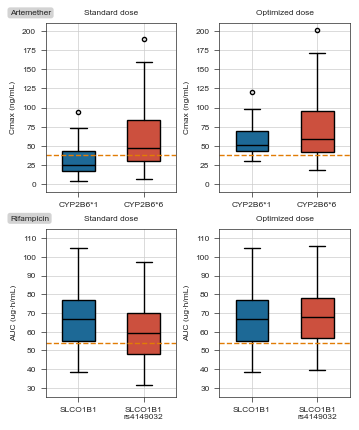

In [37]:
def boxplot(ax, df, title, cats = None, ylim = None, target = None):
    colors = [NamedColors().blue, NamedColors().red]
    columns = list(df.columns)[1:]
    ylabel = columns[0]
    xlabel = columns[1]
    if cats is None:
        cats = []
        for c in df[xlabel].tolist():
            if c not in cats:
                cats += [c]
    flierprops = dict(marker='o', color='black', markersize=3)
    medianprops = dict(color='black', linewidth=1)
    boxes = ax.boxplot([df[df[xlabel] == c][ylabel] for c in cats], tick_labels=[c.replace(" ", "\n") for c in cats], patch_artist=True, widths=0.5, flierprops=flierprops, medianprops=medianprops)
    for i, box in enumerate(boxes['boxes']):
        box.set(linewidth=1)
        box.set(facecolor=colors[i])
    if ylim is not None:
        ax.set_ylim(ylim)
    if target is not None:
        ax.axhline(y=target, color=NamedColors().orange, linestyle='--', lw=1)
    stylia.label(ax, xlabel="", ylabel=ylabel.replace(".", "·"), title=title)

fig, axs = stylia.create_figure(2, 2, width=TWO_COLUMNS_WIDTH*0.5, height=TWO_COLUMNS_WIDTH*0.6)

file_name = "data/pbpk/Artemether box plots.xlsx"

ds = pd.read_excel(file_name, sheet_name="Artemether_standard dose")
do = pd.read_excel(file_name, sheet_name="Artemether_optimized dose")

ax = axs.next()
boxplot(ax, ds, title="Standard dose", cats=["CYP2B6*1", "CYP2B6*6"], ylim=[-10, 210], target=38.6)

ax = axs.next()
boxplot(ax, do, "Optimized dose", cats=["CYP2B6*1", "CYP2B6*6"], ylim = [-10, 210], target=38.6)

file_name = "data/pbpk/Rifampicin_boxplot_data.xlsx"

ds = pd.read_excel(file_name, sheet_name="Rifampicin_standard_dose")
do = pd.read_excel(file_name, sheet_name="Rifampicin_optimized_dose")

ax = axs.next()
boxplot(ax, ds, title="Standard dose", cats=["SLCO1B1", "SLCO1B1 rs4149032"], ylim=[25, 115], target=54.2)

ax = axs.next()
boxplot(ax, do, title="Optimized dose", cats=["SLCO1B1", "SLCO1B1 rs4149032"], ylim=[25, 115], target=54.2)

bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey", linewidth=0)
fig.text(0.02, 0.97, "Artemether", ha='left', fontsize=6, bbox=bbox_props)
fig.text(0.02, 0.487, "Rifampicin", ha='left', fontsize=6, bbox=bbox_props)

plt.tight_layout()

stylia.save_figure("assets/artermether_rifampicin_boxplots.png")
stylia.save_figure("assets/artermether_rifampicin_boxplots.pdf")

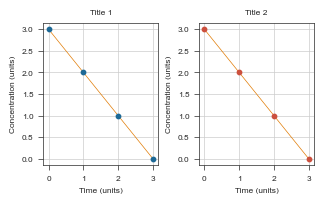

In [57]:
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH*0.47, height=TWO_COLUMNS_WIDTH*0.25)

ax = axs.next()
x = [0, 1, 2, 3]
y = [3, 2, 1, 0]
ax.scatter(x, y, color=NamedColors().blue, zorder=1000)
ax.plot(x, y, color=NamedColors().orange)
stylia.label(ax, xlabel="Time (units)", ylabel="Concentration (units)", title="Title 1")


ax = axs.next()
x = [0, 1, 2, 3]
y = [3, 2, 1, 0]
ax.scatter(x, y, color=NamedColors().red, zorder=1000)
ax.plot(x, y, color=NamedColors().orange)
stylia.label(ax, xlabel="Time (units)", ylabel="Concentration (units)", title="Title 2")

plt.tight_layout()
stylia.save_figure("assets/pbpk_artemether_fits.png")
stylia.save_figure("assets/pbpk_artemether_fits.pdf")